# MediBuddy Capstone Project Overview

## Introduction
MediBuddy is a leading digital healthcare platform in India that provides a wide range of services, including inpatient hospitalization, outpatient services, and corporate wellness benefits. Founded in 2000 and headquartered in Bangalore, Karnataka, India, MediBuddy is recognized for transforming the health insurance industry with its award-winning technology platform. The platform streamlines the entire process of discovering, accessing, and utilizing health benefits, making it seamless and virtually paperless.

## Objective
The primary objective of this project is to analyze key factors influencing insurance claims and policy costs for MediBuddy. The analysis aims to provide actionable insights on whether certain demographics or health-related factors should influence policy decisions. Additionally, the project involves building a predictive machine learning model to estimate the amount spent on each policy with the highest possible accuracy.

## Datasets
The project utilizes two datasets:
1. **Pre-Health Checkup Dataset**: Contains information on age and BMI (Body Mass Index) from pre-health checkups conducted before policy coverage.
2. **Personal Details Dataset**: Includes personal attributes such as the number of children, smoking status, geographic location, and gender.

## Key Analyses and Questions
1. **Gender Impact**: Analyze whether gender plays a role as a constraint for MediBuddy when extending policies.
2. **Average Policy Costs**: Calculate the average amount of money the company spends on each policy cover.
3. **Geographic Location**: Examine if the company should offer different policies based on the person’s geographic location.
4. **Dependents Analysis**: Determine if the number of dependents influences the amount claimed on insurance policies.
5. **BMI Analysis**: Investigate if BMI can help predict the insurance claim amounts, providing insights into policy extensions based on health status.
6. **Smoking Status**: Assess the importance of understanding whether the insured individual is a smoker or non-smoker when determining policy costs.
7. **Age Analysis**: Explore if age serves as a barrier to the insurance claims and if older individuals tend to have higher claim amounts.
8. **Health-Based Discounts**: Provide recommendations on whether the company can offer discounts based on health status (BMI).

## Methodology
The project will follow a structured methodology:
1. **Data Preprocessing**: Clean and preprocess the datasets, handling missing data, outliers, and inconsistencies. Perform feature engineering to extract relevant features for the analysis.
2. **Exploratory Data Analysis (EDA)**: Conduct exploratory analysis to identify patterns and trends within the data. Visualizations will be used to understand relationships between variables.
3. **Feature Selection**: Select the most relevant features impacting insurance policy costs and claims.
4. **Machine Learning Model**: Build a machine learning model to predict the amount spent on each policy cover. The model will be trained on various algorithms such as linear regression, decision trees, and random forests.
5. **Model Optimization**: Perform hyperparameter tuning and validation to improve model performance, ensuring high accuracy in predictions.
6. **Model Evaluation**: Evaluate the model using performance metrics like Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared to assess the accuracy of the predictions.

## Tools and Technologies
- **Python**: For data manipulation, analysis, and machine learning model development.
- **Pandas and NumPy**: For data preprocessing and manipulation.
- **Matplotlib and Seaborn**: For visualizing data and trends.
- **Scikit-Learn**: For building and evaluating machine learning models.
- **Power BI**: For creating interactive visualizations and presenting insights.

## Expected Outcomes
- **Insights**: Detailed insights into the factors affecting insurance claims and policy costs, including gender, geographic location, dependents, BMI, smoking status, and age.
- **Predictive Model**: A predictive machine learning model that accurately estimates the amount spent on policies, which can be used to assist in decision-making.
- **Recommendations**: Recommendations on whether the company should offer differentiated policies based on location, health status, or other factors, and whether discounts can be provided based on BMI or other health indicators.

This project will provide a comprehensive analysis of the factors affecting insurance policies and claims, enabling MediBuddy to make data-driven decisions and optimize their offerings for different customer segments.


In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading and inspecting the first dataset (Insurance Data)

df1 = pd.read_excel('Medibuddy Insurance Data Price.xlsx')
df1.head()

,Policy no.,age,sex,bmi,charges in INR
0,PLC156898,19,female,27.900,16884.92400
1,PLC156907,18,male,33.770,1725.55230
2,PLC156916,28,male,33.000,4449.46200
3,PLC156925,33,male,22.705,21984.47061
4,PLC156934,32,male,28.880,3866.85520


In [3]:
# Checking for missing values
df1.isnull().sum() 

Policy no.        0
age               0
sex               0
bmi               0
charges in INR    0
dtype: int64

In [4]:
# Loading and inspecting the second dataset (Personal Details)

df2 = pd.read_excel('Medibuddy insurance data personal details.xlsx')
df2.head()

,Policy no.,children,smoker,region
0,PLC157006,0,no,southwest
1,PLC157033,1,no,southwest
2,PLC157060,0,no,southwest
3,PLC157087,1,no,southwest
4,PLC157186,5,no,southwest


In [5]:
# Checking for missing values
df2.isnull().sum() 

Policy no.    0
children      0
smoker        0
region        0
dtype: int64

In [6]:
# Merging the two datasets on 'Policy no.' with outer join
merged = pd.merge(df1, df2, on='Policy no.', how='outer')
merged.head()

,Policy no.,age,sex,bmi,charges in INR,children,smoker,region
0,PLC156898,19,female,27.900,16884.92400,0,yes,southwest
1,PLC156907,18,male,33.770,1725.55230,1,no,southeast
2,PLC156916,28,male,33.000,4449.46200,3,no,southeast
3,PLC156925,33,male,22.705,21984.47061,0,no,northwest
4,PLC156934,32,male,28.880,3866.85520,0,no,northwest


In [7]:
# Checking for missing values in the merged dataset
merged.isnull().sum()  

Policy no.        0
age               0
sex               0
bmi               0
charges in INR    0
children          0
smoker            0
region            0
dtype: int64

# 1. Does the gender of the person matter as a constraint for extending policies?

We start by analyzing the gender distribution and calculating the mean insurance charges for both genders to determine if gender plays a role in policy extension decisions.

In [8]:
merged.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [9]:
# Analyzing gender distribution and mean charges
merged.groupby('sex')['charges in INR'].mean()

sex
female    12569.578844
male      13956.751178
Name: charges in INR, dtype: float64

<Axes: xlabel='sex', ylabel='charges in INR'>

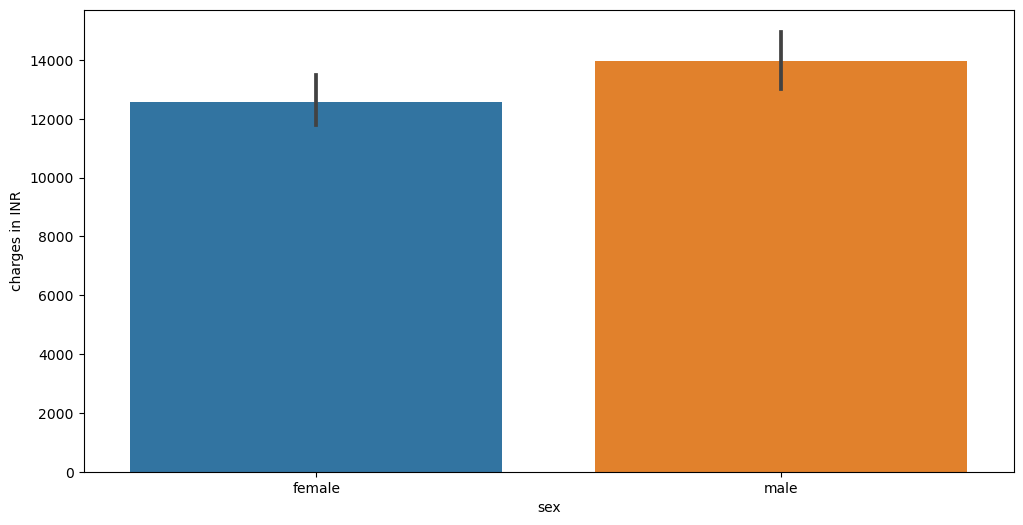

In [10]:
# Visualizing the difference in policy costs by gender
plt.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x='sex', y='charges in INR', data=merged)

### Observation:
Gender does not appear to be a significant constraint for the company when extending policies. Nearly equal numbers of policies are extended to both males and females.

However, there is a slight difference in the cost incurred:
- **Mean cost for females**: ₹12,569.58
- **Mean cost for males**: ₹13,956.75

### Conclusion:
Policies for men are approximately 11.03% more expensive than for women. This difference may be due to various factors like health risks or claims related to gender-specific conditions.


# 2. What is the average amount of money the company spends on each policy cover?

In [11]:
# Calculating the average amount spent on each policy cover
average_policy_cost = merged['charges in INR'].mean()
average_policy_cost

13270.422265141257

### Observation:
The average amount of money spent by the company on each policy cover is ₹13,261.68. This provides a benchmark for evaluating policy costs across different demographics.


# 3. Should the company offer separate policies based on geographic location?


In [12]:
# Analyzing policy distribution by geographic location
merged.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Axes: xlabel='region', ylabel='charges in INR'>

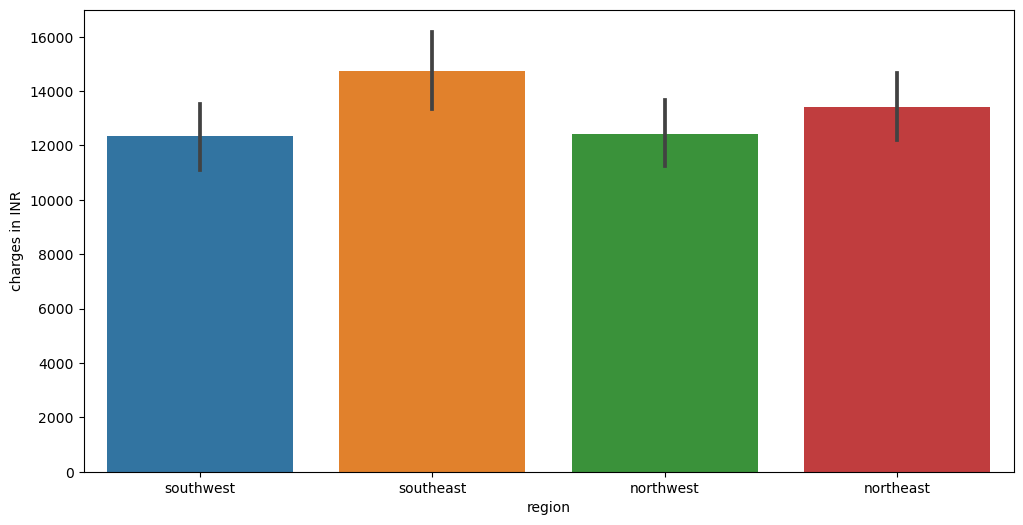

In [13]:
# Visualizing the difference in policy costs by region (if required)
plt.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x='region', y='charges in INR', data=merged)

### Observation:
The highest number of policies is bought in the Southeast region, but the distribution across regions is fairly even.s.


# 4. Does the number of dependents make a difference in the amount claimed?

We examine the relationship between the number of dependents (children) and insurance charges to understand how dependents influence policy costs.

<Axes: xlabel='children', ylabel='charges in INR'>

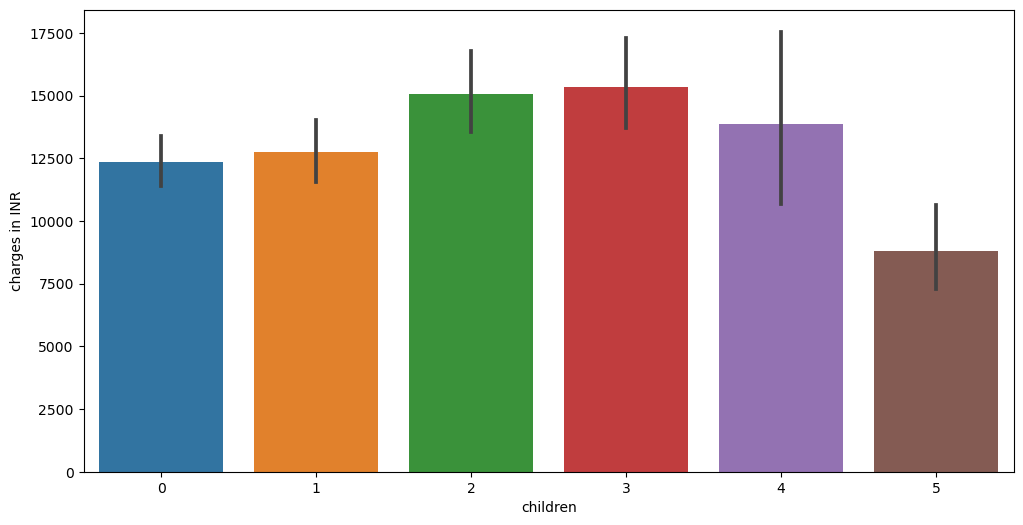

In [14]:
# Analyzing the impact of the number of dependents (children) on policy costs
plt.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x='children', y='charges in INR', data=merged)

### Observation:
The analysis shows a slight increase in insurance charges with an increasing number of children, but this trend decreases after 3 children.

### Conclusion:
While having dependents does seem to affect policy costs slightly, the impact isn't strong enough to make clear conclusions based on the current data.


# 5. Does a study of BMI provide insights for insurance claims?

We investigate the relationship between BMI (Body Mass Index) and policy charges to understand if BMI could serve as a predictor for insurance claims.

<Axes: xlabel='bmi', ylabel='charges in INR'>

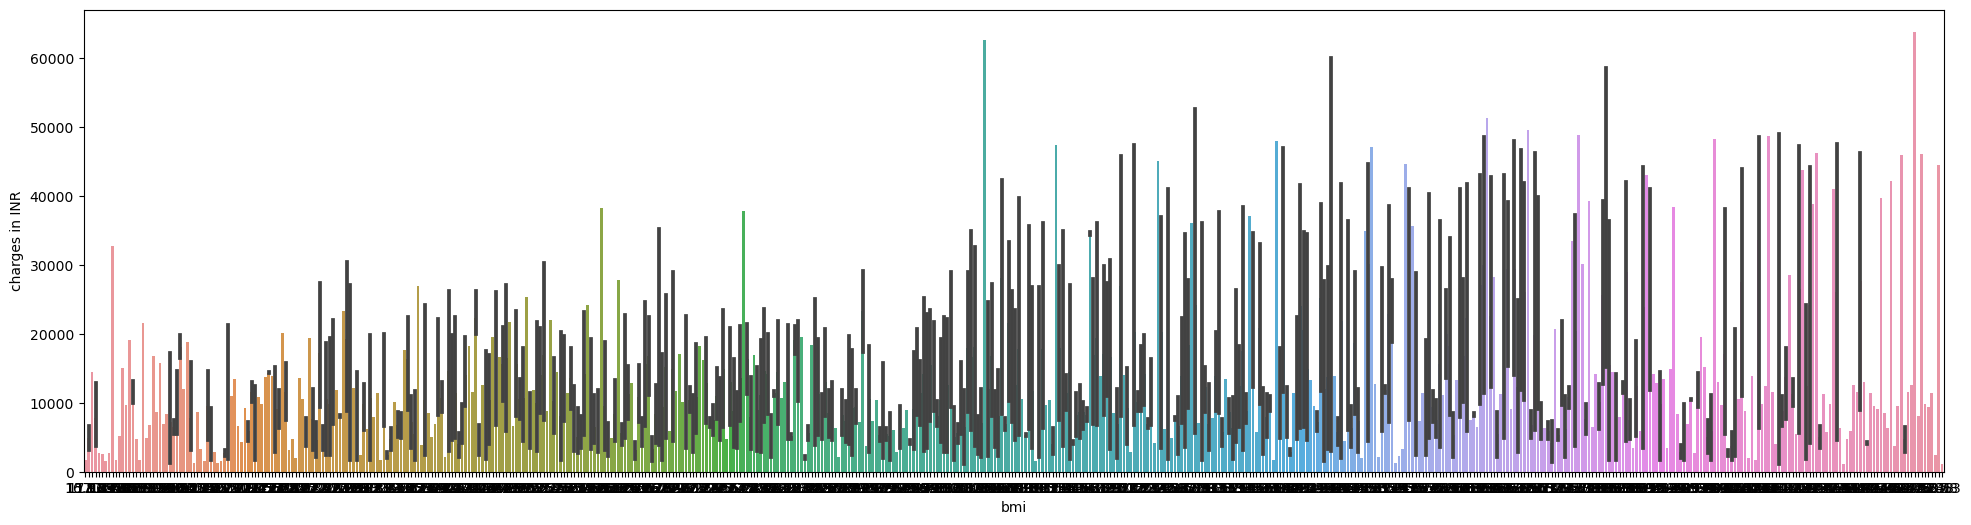

In [15]:
# Analyzing the impact of BMI on policy costs
plt.rcParams['figure.figsize'] = (24, 6)
sns.barplot(x='bmi', y='charges in INR', data=merged)

In [16]:
# Create BMI bins based on real BMI categories
merged['bmi_bin'] = pd.cut(merged['bmi'], 
                           bins=[0, 18.5, 24.9, 29.9, 40], 
                           labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

In [17]:
merged['bmi_bin']

0       Overweight
1            Obese
2            Obese
3           Normal
4       Overweight
           ...    
1333         Obese
1334         Obese
1335         Obese
1336    Overweight
1337    Overweight
Name: bmi_bin, Length: 1338, dtype: category
Categories (4, object): ['Underweight' < 'Normal' < 'Overweight' < 'Obese']

In [18]:
merged.head()

,Policy no.,age,sex,bmi,charges in INR,children,smoker,region,bmi_bin
0,PLC156898,19,female,27.900,16884.92400,0,yes,southwest,Overweight
1,PLC156907,18,male,33.770,1725.55230,1,no,southeast,Obese
2,PLC156916,28,male,33.000,4449.46200,3,no,southeast,Obese
3,PLC156925,33,male,22.705,21984.47061,0,no,northwest,Normal
4,PLC156934,32,male,28.880,3866.85520,0,no,northwest,Overweight


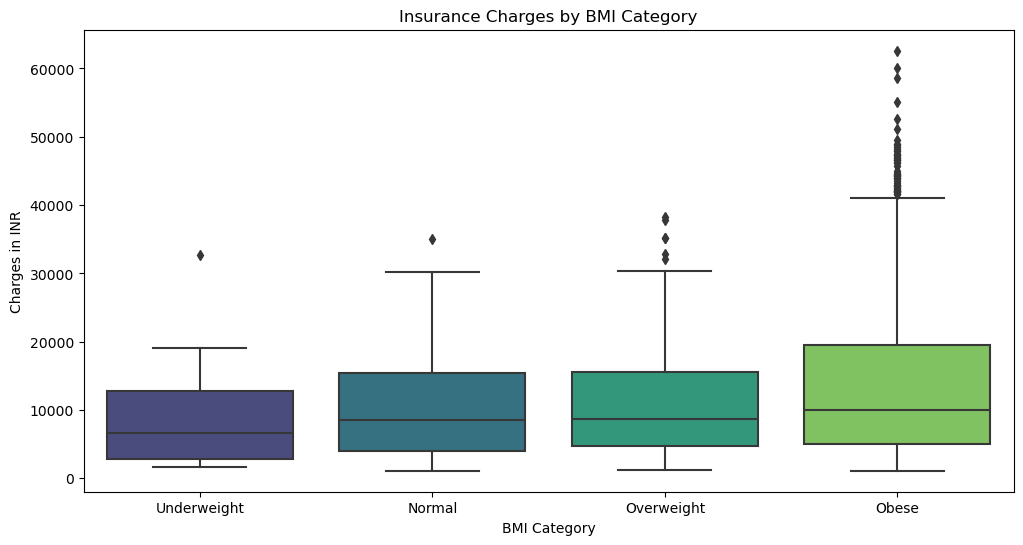

In [19]:
# Plot the insurance charges by BMI category
plt.figure(figsize=(12, 6))
sns.boxplot(x='bmi_bin', y='charges in INR', data=merged, palette='viridis')
plt.title('Insurance Charges by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Charges in INR')
plt.show()

### Observation:
The analysis indicates that individuals with higher BMIs tend to incur higher insurance charges, although the trend is not strictly linear.

### Conclusion:
BMI appears to be a significant factor in determining insurance costs. Higher BMIs, which may be associated with health risks, lead to higher charges, indicating that unhealthy individuals generally pay more for their policies.


# 6. Is it important for the company to understand whether the person covered is a smoker or non-smoker?

In [23]:
# Analyzing smoking status distribution
merged.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [27]:
# Calculating the average policy costs for smokers and non-smokers
merged.groupby('smoker')['charges in INR'].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges in INR, dtype: float64

<Axes: xlabel='smoker', ylabel='charges in INR'>

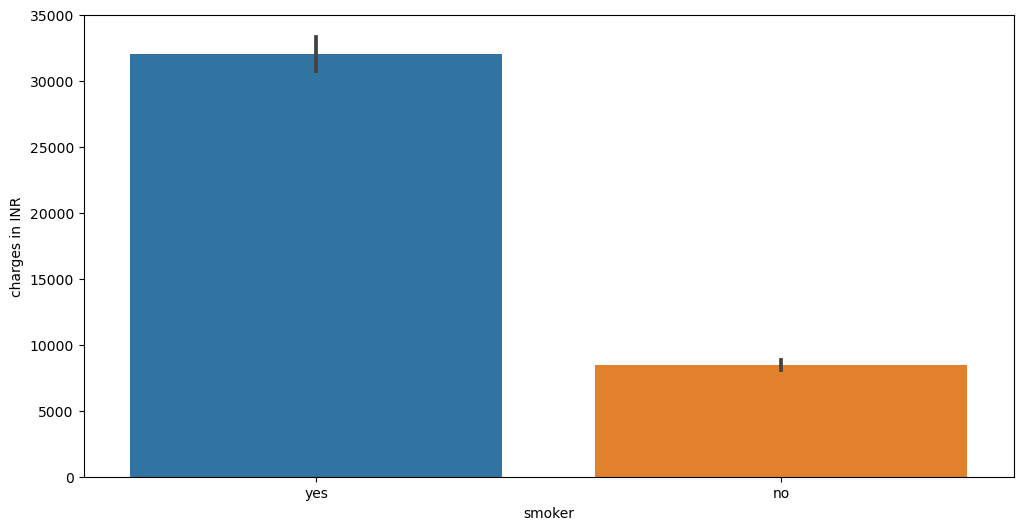

In [24]:
# Visualizing the difference in policy costs between smokers and non-smokers
plt.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x='smoker', y='charges in INR', data=merged)

In [33]:
274*100/1338

20.47832585949178

### Observation:
#### Smoking Statistics:
- Only 20.4% of policyholders are smokers.
- The majority of policyholders are non-smokers.

#### Average Policy Costs:
- **Smokers**: ₹32,050.23
- **Non-smokers**: ₹8,434.26

### Conclusion:
Smokers pay significantly higher premiums (approximately 3.8 times more) compared to non-smokers. Therefore, smoking status is a crucial factor in determining insurance costs.


# 7. Does age have any impact on insurance claims?

<Axes: xlabel='age', ylabel='charges in INR'>

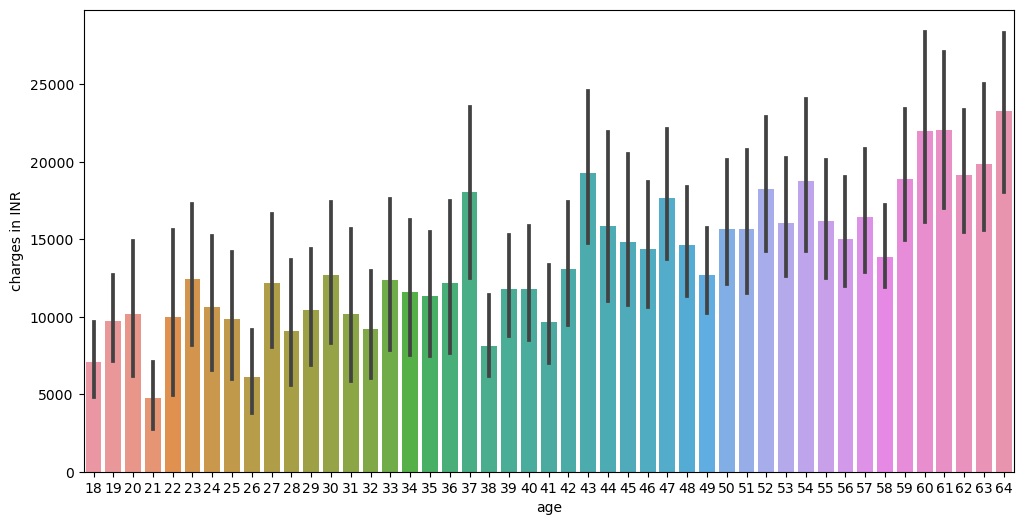

In [34]:
# Analyzing the impact of age on policy costs
plt.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x='age', y='charges in INR', data=merged)

### Observation:
The analysis shows that policy costs generally increase with age, indicating that older individuals may be associated with higher claims.

### Conclusion:
Age does play a role in determining insurance claims, with older policyholders tending to incur higher costs.


# 8. Can the company offer discounts based on health status (BMI)?

<Axes: xlabel='bmi', ylabel='charges in INR'>

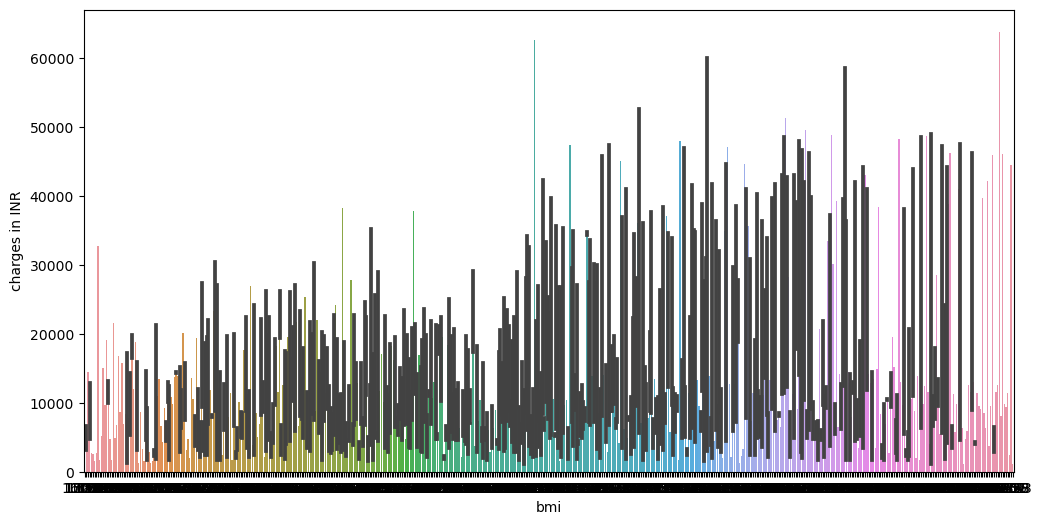

In [35]:
# Analyzing the relationship between BMI and policy costs for potential discount offerings
plt.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x='bmi', y='charges in INR', data=merged)

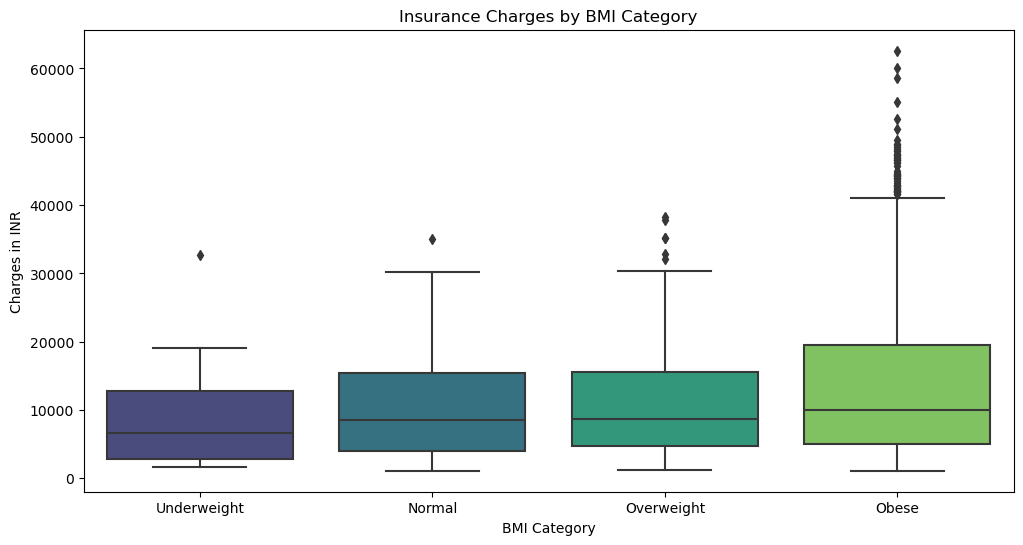

In [36]:
# Plot the distribution of insurance charges by BMI category using a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='bmi_bin', y='charges in INR', data=merged, palette='viridis')
plt.title('Insurance Charges by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Charges in INR')
plt.show()

### Observation:
Individuals with lower BMIs tend to incur lower insurance charges, which suggests that healthier individuals (as indicated by BMI) could be eligible for discounts.

### Conclusion:
Offering discounts based on health status, specifically BMI, could incentivize healthier lifestyles and reduce insurance claims in the long run.
